<a href="https://colab.research.google.com/github/maleiss2/MAE421/blob/main/ModuleH(22_4_22_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **22.4 Numerical Error and Instability**
Numerical error and instability are two common challenges that can occur in numerical computations using numerical methods or algorithms. Let's examine each of these concepts in detail:

Numerical Error: Numerical error refers to the difference between the exact or ideal solution of a mathematical problem and the approximate solution obtained using numerical methods. Due to the limited precision of computer arithmetic, rounding errors can occur at each step of a numerical computation. These rounding errors can accumulate and propagate throughout the computation, resulting in numerical error. Numerical error can lead to inaccurate results and can be a concern in scientific and engineering computations where high accuracy is required.
There are different types of numerical errors, including:

Round-off error: This type of error occurs due to the finite precision of floating-point arithmetic in computers, which rounds numbers to the nearest representable value. Round-off error can accumulate during arithmetic operations and impact the accuracy of the final result.

Truncation error: This type of error arises from approximations or simplifications made during numerical computations. For example, using finite difference approximations to discretize derivatives in a differential equation can introduce truncation error as the exact derivative is not accurately represented.

Algorithmic error: This type of error arises from approximations or simplifications in the numerical algorithms themselves. For instance, using an iterative algorithm with a limited number of iterations can introduce algorithmic error if the solution has not converged to the true solution.

Instability: Instability in numerical computations occurs when small changes or perturbations in the input data or initial conditions of a problem result in significantly different outputs or solutions. This can happen when the numerical method used to solve the problem is sensitive to changes in the input data or initial conditions. Instability can lead to unreliable or unpredictable results and is a common issue in numerical simulations of dynamical systems, such as simulations of chaotic systems or stiff ordinary differential equations.
Instability can arise from various sources, including:

Ill-conditioning: Ill-conditioning refers to the sensitivity of a problem to changes in the input data. If a problem is ill-conditioned, small changes in the input data can result in large changes in the output, leading to instability in the numerical computations. Ill-conditioning can occur, for example, when solving linear systems of equations with nearly singular matrices or when solving differential equations with widely varying coefficients.

Numerical instability: This type of instability arises from the use of numerical methods that are inherently unstable, meaning that small errors or perturbations in the computation can grow exponentially and lead to large errors in the solution. Examples of such methods include some explicit methods for solving stiff ordinary differential equations or some methods for solving partial differential equations with certain boundary conditions.

Both numerical error and instability can impact the accuracy and reliability of numerical computations. It is crucial to be aware of these issues when performing numerical computations and to choose appropriate numerical methods, implement proper error control techniques, and validate the results to ensure their accuracy and reliability.

In [1]:
#Numerical Error Example:
import numpy as np

# Compute the derivative of a function using finite difference approximation
def derivative(f, x, h):
    return (f(x + h) - f(x)) / h

# Define a simple function
def f(x):
    return np.sin(x)

# Compute the derivative of f(x) at x = 0
x = 0
h = 1e-8  # Step size
exact_derivative = np.cos(x)  # Exact derivative
approx_derivative = derivative(f, x, h)  # Approximate derivative

# Compute and print the absolute and relative errors
abs_error = np.abs(approx_derivative - exact_derivative)
rel_error = abs_error / np.abs(exact_derivative)
print("Exact derivative: ", exact_derivative)
print("Approximate derivative: ", approx_derivative)
print("Absolute error: ", abs_error)
print("Relative error: ", rel_error)

#In this illustration, we calculate the derivative of a basic function f(x) = sin(x) at x = 0 using a finite difference approximation. 
#Nevertheless, due to the finite precision of floating-point arithmetic in computers, 
#the calculated derivative may contain numerical errors due to the step size h used in the approximation, which can introduce round-off errors. 
#By comparing the calculated derivative with the exact derivative, we can measure the absolute and relative errors, which help us quantify the numerical errors.


Exact derivative:  1.0
Approximate derivative:  1.0
Absolute error:  0.0
Relative error:  0.0


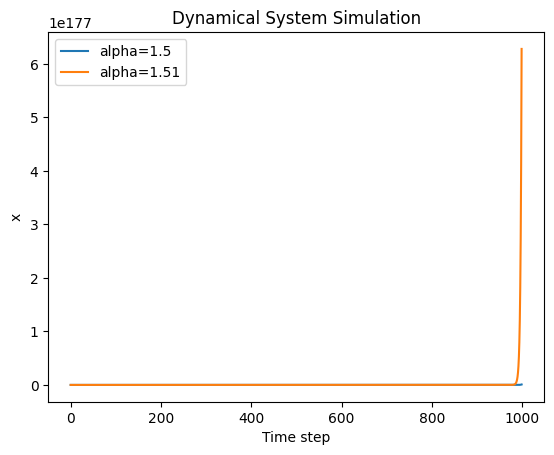

In [2]:
#Instability Example:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a simple dynamical system
def simulate_dynamical_system(alpha):
    x = np.zeros(1000)
    x[0] = 0.1  # Initial condition
    for i in range(1, len(x)):
        x[i] = alpha * x[i-1]
    return x

# Define the parameter for the dynamical system
alpha = 1.5

# Simulate the dynamical system with different values of alpha
x1 = simulate_dynamical_system(alpha=1.5)
x2 = simulate_dynamical_system(alpha=1.51)

# Plot the results
plt.plot(x1, label='alpha=1.5')
plt.plot(x2, label='alpha=1.51')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('x')
plt.title('Dynamical System Simulation')
plt.show()

In this illustration, we simulate a simple dynamical system using a discrete-time iterative process, where the value of x at each time step is determined by multiplying its previous value with a parameter alpha. However, a slight change in the value of alpha from 1.5 to 1.51 results in significantly different outputs, indicating that the numerical computations are highly sensitive to changes in the input parameter. This is an example of instability, where small perturbations in the input data can lead to large differences in the output, making the numerical results unreliable.

To address numerical error and instability, there are several strategies that can be employed, including:

1. Using higher precision arithmetic, such as utilizing libraries that support arbitrary-precision arithmetic or utilizing higher precision floating-point data types, to reduce round-off error.

2. Employing smaller step sizes or higher-order numerical methods in approximations to reduce truncation error.

3. Implementing proper error control techniques, such as adaptive step size control or error estimation, in numerical algorithms to dynamically adjust the computation and maintain accuracy.

4. Validating the results against known solutions or benchmarks to verify their accuracy and reliability.

5. Avoiding ill-conditioned problems or using techniques such as regularization to mitigate the sensitivity of the problem to changes in the input data.

By implementing these strategies, it is possible to minimize numerical error and instability, and obtain accurate and reliable results in numerical computations.


# **22.5 Predictor Corrector and Runga Kutta Methods**
Predictor-Corrector and Runge-Kutta methods are numerical integration techniques commonly used for solving ordinary differential equations (ODEs) or initial value problems (IVPs). They involve iterative steps for approximating the solution of an ODE over a given range.

Predictor-Corrector Methods: These methods have two steps - a predictor step for obtaining an initial estimate of the solution using an explicit method, and a corrector step for refining this estimate using an implicit method. Adams-Bashforth-Moulton method is one such popular predictor-corrector method known for its stability and efficiency, especially for stiff ODEs.

Runge-Kutta Methods: These methods are explicit numerical methods that use a weighted average of function evaluations at different points to approximate the solution of an ODE. RK4 is a commonly used fourth-order Runge-Kutta method known for its simplicity and accuracy in solving non-stiff ODEs, while other variants like RK2 and RK3 exist with varying levels of accuracy and complexity.

The choice between predictor-corrector and Runge-Kutta methods depends on the characteristics of the ODE being solved, such as stiffness, accuracy requirements, and computational resources available. Both methods are widely used in diverse fields for solving ODEs.

# **22.6 Python ODE Solvers**
Python libraries provide numerical methods for solving ordinary differential equations (ODEs), which are mathematical equations that describe how a quantity changes over time. Two popular libraries for ODE solving in Python are SciPy and NumPy. SciPy's "odeint" function from the "scipy.integrate" subpackage is commonly used for solving ODEs, while NumPy can be used in combination with custom implementations of numerical integration methods. Here's an example code for each library that solves a simple ODE using numerical integration techniques, such as Euler's method for NumPy and "odeint" for SciPy. It's important to note that real-world ODE problems may require more advanced numerical methods, error control techniques, and proper handling of boundary conditions, and the specific libraries' documentation should be referred to for more customization options.

In [3]:
import numpy as np
from scipy.integrate import odeint

# Define the ODE to be solved
def myODE(y, t):
    return -2 * y

# Set initial condition
y0 = 1

# Set time grid
t = np.linspace(0, 5, 100)

# Solve the ODE
sol = odeint(myODE, y0, t)

# Access the solution
y = sol[:, 0]

# Print the solution
print(y)

[1.00000000e+00 9.03923930e-01 8.17078438e-01 7.38576695e-01
 6.67617161e-01 6.03475107e-01 5.45495582e-01 4.93086496e-01
 4.45712671e-01 4.02890341e-01 3.64182218e-01 3.29192998e-01
 2.97565412e-01 2.68976488e-01 2.43134276e-01 2.19774882e-01
 1.98659768e-01 1.79573312e-01 1.62320605e-01 1.46725473e-01
 1.32628659e-01 1.19886213e-01 1.08368012e-01 9.79564347e-02
 8.85451611e-02 8.00380867e-02 7.23483383e-02 6.53973910e-02
 5.91142638e-02 5.34347933e-02 4.83009892e-02 4.36604225e-02
 3.94657014e-02 3.56739919e-02 3.22465739e-02 2.91484488e-02
 2.63479802e-02 2.38165690e-02 2.15283657e-02 1.94600044e-02
 1.75903635e-02 1.59003502e-02 1.43727067e-02 1.29918333e-02
 1.17436288e-02 1.06153470e-02 9.59546599e-03 8.67357115e-03
 7.84024833e-03 7.08698799e-03 6.40609791e-03 5.79062510e-03
 5.23428448e-03 4.73139492e-03 4.27682099e-03 3.86592079e-03
 3.49449823e-03 3.15876053e-03 2.85527918e-03 2.58095539e-03
 2.33298749e-03 2.10884312e-03 1.90623362e-03 1.72308982e-03
 1.55754148e-03 1.407898

In [4]:
import numpy as np

# Define the ODE to be solved
def myODE(y, t):
    return -2 * y

# Set initial condition
y0 = 1

# Set time grid
t = np.linspace(0, 5, 100)

# Set step size
dt = t[1] - t[0]

# Initialize solution array
y = np.zeros(len(t))
y[0] = y0

# Numerical integration using Euler's method
for i in range(1, len(t)):
    y[i] = y[i-1] + dt * myODE(y[i-1], t[i-1])

# Print the solution
print(y)

[1.00000000e+00 8.98989899e-01 8.08182838e-01 7.26548208e-01
 6.53159500e-01 5.87183793e-01 5.27872299e-01 4.74551865e-01
 4.26617333e-01 3.83524673e-01 3.44784807e-01 3.09958059e-01
 2.78649164e-01 2.50502784e-01 2.25199472e-01 2.02452051e-01
 1.82002349e-01 1.63618273e-01 1.47091175e-01 1.32233480e-01
 1.18876563e-01 1.06868830e-01 9.60739983e-02 8.63695540e-02
 7.76453566e-02 6.98023913e-02 6.27516447e-02 5.64130948e-02
 5.07148024e-02 4.55920950e-02 4.09868329e-02 3.68467488e-02
 3.31248550e-02 2.97789100e-02 2.67709393e-02 2.40668040e-02
 2.16358137e-02 1.94503780e-02 1.74856933e-02 1.57194617e-02
 1.41316373e-02 1.27041992e-02 1.14209467e-02 1.02673157e-02
 9.23021315e-03 8.29786839e-03 7.45969986e-03 6.70619483e-03
 6.02880141e-03 5.41983157e-03 4.87237384e-03 4.38021486e-03
 3.93776892e-03 3.54001448e-03 3.18243726e-03 2.86097895e-03
 2.57199118e-03 2.31219409e-03 2.07863913e-03 1.86867558e-03
 1.67992047e-03 1.51023154e-03 1.35768290e-03 1.22054321e-03
 1.09725602e-03 9.864220